In [81]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Data Preparing

## 1) Dataset 불러오기

In [82]:
# 데이터 불러오기
data_df = pd.read_csv('titanic.csv')

In [83]:
# 중복값 삭제(ticket 기준)
data_df = data_df.drop_duplicates(['Ticket'],keep='first')

In [84]:
# 결측값 있는 열(Embarked)의 행 삭제
data_df.dropna(subset = ["Embarked"], inplace=True)

In [85]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 680 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    680 non-null int64
Survived       680 non-null int64
Pclass         680 non-null int64
Name           680 non-null object
Sex            680 non-null object
Age            533 non-null float64
SibSp          680 non-null int64
Parch          680 non-null int64
Ticket         680 non-null object
Fare           680 non-null float64
Cabin          136 non-null object
Embarked       680 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 69.1+ KB


In [86]:
# x,y data 만들기
y_data = data_df[['Survived']]
del data_df['Survived']
x_data = data_df.copy()

## 2) Data 전처리

In [87]:
# 필요없는 열 지우기
del x_data['PassengerId']
del x_data['Ticket']
del x_data['Name']

# Sex (남자=1 여자=0)
x_data['Sex'].replace(['female','male'],[0,1],inplace=True)
x_data.head()

# Cabin
x_data[['Cabin']] = x_data[['Cabin']].fillna(value='0')
x_data['Cabin']=x_data['Cabin'].str[:1]
x_data['Cabin'].replace([ '0','A','B', 'C','D','E','F','G','T'],[0,1,2,3,4,5,6,7,8],inplace=True)

#Embarked 
x_data['Embarked'].replace(['S','C', 'Q'],[0,1,2],inplace=True)
x_data['Embarked'] = x_data['Embarked'].astype(int)

# Age (Pclass 각 그룹별 평균값으로 결측치 채우기)
age_mean= x_data.groupby('Pclass').agg({'Age': np.mean})
age_mean = age_mean['Age'].to_dict()

Pclass1_age = x_data[x_data['Pclass'] ==1 ]['Age'].fillna(age_mean[1])
Pclass2_age = x_data[x_data['Pclass'] ==2 ]['Age'].fillna(age_mean[2]) 
Pclass3_age = x_data[x_data['Pclass'] ==3 ]['Age'].fillna(age_mean[3])

filled_age  = pd.concat([Pclass1_age,Pclass2_age], axis=0)
filled_age  = pd.concat([filled_age,Pclass3_age], axis=0) 

x_data['Age'] = filled_age
x_data['Age'] = x_data['Age'].round().astype(int)

# Fare
x_data['Fare'] = x_data['Fare'].round().astype(int)

In [88]:
# data_x_test = data_x[data_x['Pclass']==1]
# data_x_test_mean_age_1 = data_x_test['Age'].mean()

In [89]:
x_data.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
count,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000
mean,2.364706,0.698529,30.604412,0.275000,0.205882,23.210294,0.695588,0.370588
std,0.813684,0.459234,12.374887,0.670848,0.586013,36.919467,1.551277,0.654217
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,24.000000,0.000000,0.000000,8.000000,0.000000,0.000000
50%,3.000000,1.000000,27.000000,0.000000,0.000000,10.000000,0.000000,0.000000
75%,3.000000,1.000000,37.000000,0.000000,0.000000,26.000000,0.000000,1.000000
max,3.000000,1.000000,80.000000,8.000000,5.000000,512.000000,8.000000,2.000000


In [90]:
x_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 680 entries, 0 to 890
Data columns (total 8 columns):
Pclass      680 non-null int64
Sex         680 non-null int64
Age         680 non-null int32
SibSp       680 non-null int64
Parch       680 non-null int64
Fare        680 non-null int32
Cabin       680 non-null int64
Embarked    680 non-null int32
dtypes: int32(3), int64(5)
memory usage: 39.8 KB


## 3) 엑셀 파일로 저장하기

In [9]:
x_data.to_excel('x_data.xlsx',index=False, encoding='utf-8')

# 2. Machine Learing

## 1) 모델 비교하기

In [145]:
# x_data = np.array(x_data)
# y_data = np.array(y_data)

In [155]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score, recall_score, precision_score , roc_curve, auc



In [121]:
# train/test
x_train, x_test, y_train, y_test = train_test_split(
    x_data, y_data, test_size=0.3, random_state=0)

In [182]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
pred_test = logreg.predict_proba(x_test)
print('Train Data',logreg.score(x_train, y_train) * 100)
print('Test Data',logreg.score(x_test, y_test)*100)
print ('Accuracy:', accuracy_score(y_pred,y_test)* 100)
print ('F1 score:', f1_score( y_pred, y_test)* 100)
print ('Recall:', recall_score(y_test, y_pred)* 100)
print ('Precision:', precision_score(y_test, y_pred)* 100)


Train Data 81.30252100840336 2
Test Data 79.41176470588235 2
Accuracy: 79.41176470588235 2
F1 score: 72.36842105263158 2
Recall: 68.75 2
Precision: 76.38888888888889 2


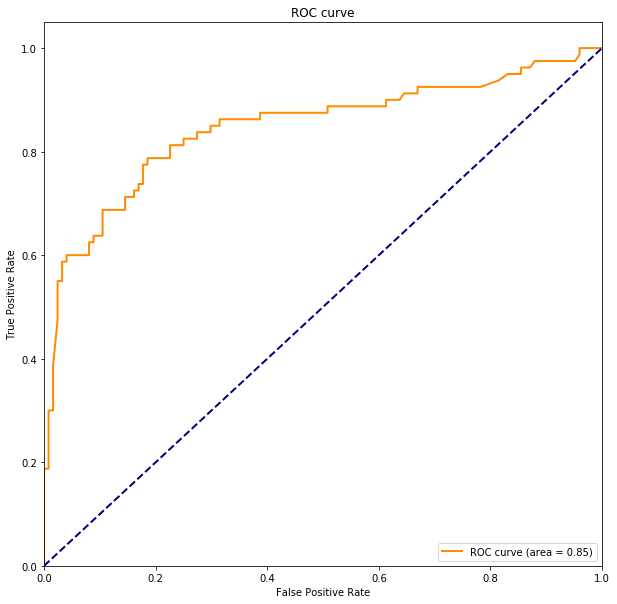

In [183]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_true=y_test, y_score=pred_test[:,1]) 
roc_auc = auc(fpr, tpr) 
roc_auc

plt.figure(figsize=(10, 10))

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.title("ROC curve")

plt.show()

In [33]:
# log_accuracy = accuracy_score(y_test,y_pred)
# print(log_accuracy)

0.7941176470588235


In [133]:
# Support Vector Machines

svc = SVC(C=100, gamma=0.01)
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
print('Train Data',svc.score(x_train, y_train) * 100)
print('Test Data',svc.score(x_test, y_test)*100)
print ('Accuracy:', accuracy_score(y_test, y_pred)* 100)
print ('F1 score:', f1_score(y_test, y_pred)* 100)
print ('Recall:', recall_score(y_test, y_pred)* 100)
print ('Precision:', precision_score(y_test, y_pred)* 100)

Train Data 89.49579831932773 2
Test Data 78.43137254901961 2
Accuracy: 78.43137254901961 2
F1 score: 71.7948717948718 2
Recall: 70.0 2
Precision: 73.68421052631578 2


In [134]:
# KNN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print('Train Data',knn.score(x_train, y_train) * 100)
print('Test Data',knn.score(x_test, y_test)*100)
print ('Accuracy:', accuracy_score(y_test, y_pred)* 100)
print ('F1 score:', f1_score(y_test, y_pred)* 100)
print ('Recall:', recall_score(y_test, y_pred)* 100)
print ('Precision:', precision_score(y_test, y_pred)* 100)

Train Data 80.46218487394958 2
Test Data 72.05882352941177 2
Accuracy: 72.05882352941177 2
F1 score: 59.57446808510638 2
Recall: 52.5 2
Precision: 68.85245901639344 2


In [135]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
y_pred = gaussian.predict(x_test)
print('Train Data',gaussian.score(x_train, y_train) * 100)
print('Test Data',gaussian.score(x_test, y_test)*100)
print ('Accuracy:', accuracy_score(y_test, y_pred)* 100)
print ('F1 score:', f1_score(y_test, y_pred)* 100)
print ('Recall:', recall_score(y_test, y_pred)* 100)
print ('Precision:', precision_score(y_test, y_pred)* 100)

Train Data 78.78151260504201 2
Test Data 80.88235294117648 2
Accuracy: 80.88235294117648 2
F1 score: 76.92307692307693 2
Recall: 81.25 2
Precision: 73.03370786516854 2


In [136]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(x_train, y_train)
y_pred = perceptron.predict(x_test)
print('Train Data',perceptron.score(x_train, y_train) * 100)
print('Test Data',perceptron.score(x_test, y_test)*100)
print ('Accuracy:', accuracy_score(y_test, y_pred)* 100)
print ('F1 score:', f1_score(y_test, y_pred)* 100)
print ('Recall:', recall_score(y_test, y_pred)* 100)
print ('Precision:', precision_score(y_test, y_pred)* 100)


Train Data 73.94957983193278 2
Test Data 71.07843137254902 2
Accuracy: 71.07843137254902 2
F1 score: 52.03252032520326 2
Recall: 40.0 2
Precision: 74.4186046511628 2


In [137]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)
y_pred = linear_svc.predict(x_test)
print('Train Data',linear_svc.score(x_train, y_train) * 100)
print('Test Data',linear_svc.score(x_test, y_test)*100)
print ('Accuracy:', accuracy_score(y_test, y_pred)* 100)
print ('F1 score:', f1_score(y_test, y_pred)* 100)
print ('Recall:', recall_score(y_test, y_pred)* 100)
print ('Precision:', precision_score(y_test, y_pred)* 100)

Train Data 80.67226890756302 2
Test Data 80.3921568627451 2
Accuracy: 80.3921568627451 2
F1 score: 73.68421052631578 2
Recall: 70.0 2
Precision: 77.77777777777779 2


In [184]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(x_train, y_train)
y_pred = sgd.predict(x_test)
print('Train Data',sgd.score(x_train, y_train) * 100)
print('Test Data',sgd.score(x_test, y_test)*100)
print ('Accuracy:', accuracy_score(y_test, y_pred)* 100)
print ('F1 score:', f1_score(y_test, y_pred)* 100)
print ('Recall:', recall_score(y_test, y_pred)* 100)
print ('Precision:', precision_score(y_test, y_pred)* 100)

Train Data 71.63865546218487
Test Data 66.17647058823529
Accuracy: 66.17647058823529
F1 score: 30.303030303030297
Recall: 18.75
Precision: 78.94736842105263


In [139]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)
y_pred = decision_tree.predict(x_test)
print('Train Data',decision_tree.score(x_train, y_train) * 100)
print('Test Data',decision_tree.score(x_test, y_test)*100)
print ('Accuracy:', accuracy_score(y_test, y_pred)* 100)
print ('F1 score:', f1_score(y_test, y_pred)* 100)
print ('Recall:', recall_score(y_test, y_pred)* 100)
print ('Precision:', precision_score(y_test, y_pred)* 100)

Train Data 96.00840336134453 2
Test Data 79.41176470588235 2
Accuracy: 79.41176470588235 2
F1 score: 73.41772151898734 2
Recall: 72.5 2
Precision: 74.35897435897436 2


In [178]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)
y_pred = random_forest.predict(x_test)
print('Train Data',random_forest.score(x_train, y_train) * 100)
print('Test Data',random_forest.score(x_test, y_test)*100)
print ('Accuracy:', accuracy_score(y_test, y_pred)* 100)
print ('F1 score:', f1_score(y_test, y_pred)* 100)
print ('Recall:', recall_score(y_test, y_pred)* 100)
print ('Precision:', precision_score(y_test, y_pred)* 100)

Train Data 96.00840336134453 2
Test Data 81.86274509803921 2
Accuracy: 81.86274509803921 2
F1 score: 75.81699346405229 2
Recall: 72.5 2
Precision: 79.45205479452055 2


## 2) 모델 성능 개선

### 2-1) Kernalized SVM

In [61]:
#min-max
min_on_training = x_train.min(axis=0) # 열마다의 최소값 계산
range_on_training = (x_train - min_on_training).max(axis=0) # 분모에 해당 
X_train_scaled = (x_train - min_on_training) / range_on_training # Min-max scaling (0~1)
X_test_scaled = (x_test - min_on_training) / range_on_training

print("열마다의 최소값\n{}".format(X_train_scaled.min(axis=0)))
print("열마다의 최대값\n {}".format(X_train_scaled.max(axis=0)))

열마다의 최소값
[0. 0. 0. 0. 0. 0. 0. 0.]
열마다의 최대값
 [1. 1. 1. 1. 1. 1. 1. 1.]


In [46]:
# SVM Standardization

# from sklearn.preprocessing import StandardScaler  

# sc = StandardScaler()
# sc.fit(x_train) 

# x_train_scaled = sc.transform(x_train)
# x_test_scaled = sc.transform(x_test)

In [64]:
# SVM 최적 파라미터 찾기
from sklearn.model_selection import GridSearchCV

param_grid = {'C' : [0.1, 1, 10, 100, 1000], 
             'gamma' : [1, 0.1, 0.01, 0.001, 0.0001],
             'kernel' : ['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=1)

grid.fit(X_train_scaled, y_train)
print('The best parameters are ', grid.best_params_)

Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


The best parameters are  {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}


[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.9s finished


In [152]:
svc = SVC(C=0.1, gamma=1, kernel = 'rbf')
svc.fit(X_train_scaled, y_train)

print("Accuracy on Training set: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on Test set: {:.3f}".format(svc.score(X_test_scaled, y_test))) 

Accuracy on Training set: 0.819
Accuracy on Test set: 0.794


In [66]:
from sklearn.metrics import classification_report 

grid_predictions = grid.predict(X_test_scaled)

print(classification_report(y_test, grid_predictions)) # Precision, Recall, F1-score 등을 확인할 수 있습니다.

print("Accuracy on Training set: {:.3f}".format(grid.score(X_train_scaled, y_train)))
print("Accuracy on Test set: {:.3f}".format(grid.score(X_test_scaled, y_test)))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       124
           1       0.78      0.66      0.72        80

   micro avg       0.79      0.79      0.79       204
   macro avg       0.79      0.77      0.78       204
weighted avg       0.79      0.79      0.79       204

Accuracy on Training set: 0.819
Accuracy on Test set: 0.794


### 2-2) Logistic Regression

In [185]:
titanic_X = x_data[:,(1,2)]
titanic_Y = y_data

In [186]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(titanic_X,titanic_Y, test_size=0.3,random_state=0)

In [190]:
model = linear_model.LogisticRegression()

# 5. Train the model 
model.fit(x_train, y_train)

# 6. Test the model
print('Accuracy: ', accuracy_score(model.predict(x_test), y_test))

# 7. Visualize the model
pred_test = model.predict_proba(x_test) # Predict 'probability'
fpr, tpr, _ = roc_curve(y_true=y_test, y_score=pred_test[:,1]) # real y & predicted y (based on "Sepal width")
roc_auc = auc(fpr, tpr) # AUC 면적의 값 (수치)


Accuracy:  0.7990196078431373


In [191]:
C_param_range = [0.1,1,10,100,1000]

for i in C_param_range:
  logreg = LogisticRegression(penalty = 'l2', C = i,random_state = 0)
  logreg.fit(x_train, y_train)
  y_pred = logreg.predict(x_test)
  print ('Accuracy:', accuracy_score(y_test, y_pred)* 100, 2)

Accuracy: 79.90196078431373 2
Accuracy: 79.90196078431373 2
Accuracy: 79.90196078431373 2
Accuracy: 79.90196078431373 2
Accuracy: 79.90196078431373 2


In [192]:
logreg = LogisticRegression(C=100)
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
pred_test = logreg.predict_proba(x_test)
print('Train Data',logreg.score(x_train, y_train) * 100, 2)
print('Test Data',logreg.score(x_test, y_test)*100, 2)
print ('Accuracy:', accuracy_score(y_pred,y_test)* 100, 2)
print ('F1 score:', f1_score( y_pred, y_test)* 100, 2)
print ('Recall:', recall_score(y_test, y_pred)* 100, 2)
print ('Precision:', precision_score(y_test, y_pred)* 100, 2)

Train Data 81.9327731092437 2
Test Data 79.90196078431373 2
Accuracy: 79.90196078431373 2
F1 score: 72.48322147651007 2
Recall: 67.5 2
Precision: 78.26086956521739 2


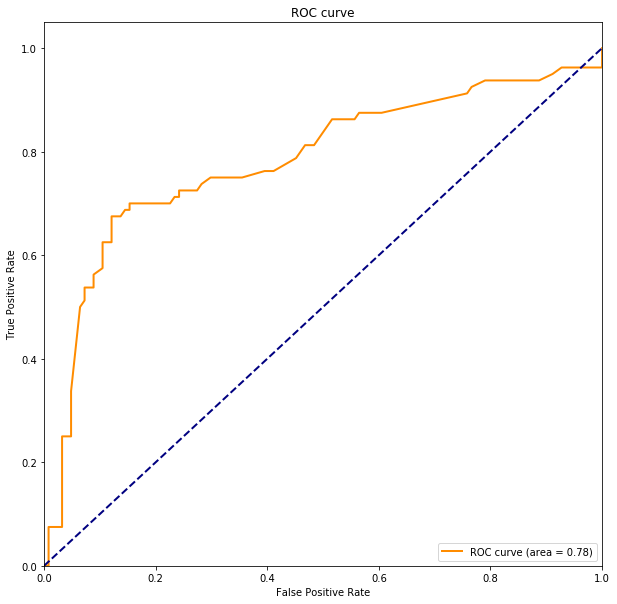

In [193]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_true=y_test, y_score=pred_test[:,1]) 
roc_auc = auc(fpr, tpr) 
roc_auc

plt.figure(figsize=(10, 10))

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.title("ROC curve")

plt.show()

## 2-3) Random Forest

In [194]:
rfc = RandomForestClassifier()

In [195]:

# random forest 최적 파라미터 찾기
from sklearn.model_selection import GridSearchCV

parameters = {
    "n_estimators":[5,10,50,100,250],
    "max_depth":[2,4,8,16,32,None] }

grid = GridSearchCV( RandomForestClassifier(), parameters, cv=5)

grid.fit(X_train_scaled, y_train)
print('The best parameters are ', grid.best_params_)

The best parameters are  {'max_depth': 4, 'n_estimators': 10}


In [196]:

random_forest = RandomForestClassifier(n_estimators=100, max_depth=9)
random_forest.fit(x_train, y_train)
y_pred = random_forest.predict(x_test)

grid_predictions = grid.predict(X_test_scaled)

print(classification_report(y_test, grid_predictions))
print('Train Data',random_forest.score(x_train, y_train) * 100, 2)
print('Test Data',random_forest.score(x_test, y_test)*100, 2)
print ('Accuracy:', accuracy_score(y_test, y_pred)* 100, 2)
print ('F1 score:', f1_score(y_test, y_pred)* 100, 2)
print ('Recall:', recall_score(y_test, y_pred)* 100, 2)
print ('Precision:', precision_score(y_test, y_pred)* 100, 2)

              precision    recall  f1-score   support

           0       0.76      0.94      0.84       124
           1       0.84      0.54      0.66        80

   micro avg       0.78      0.78      0.78       204
   macro avg       0.80      0.74      0.75       204
weighted avg       0.79      0.78      0.77       204

Train Data 84.45378151260505 2
Test Data 77.45098039215686 2
Accuracy: 77.45098039215686 2
F1 score: 69.73684210526315 2
Recall: 66.25 2
Precision: 73.61111111111111 2


## 2-4) Decision Tree

In [197]:
# export_graphviz( )의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함
export_graphviz(decision_tree, out_file="tree.dot", class_names = y_data, 
                           feature_names = x_data.feature_names, impurity=True, filled=True)

print('===============max_depth=3인 경우의 Decision Tree 시각화==================')
import graphviz
# 위에서 생성된 tree.dot 파일을 Graphiviz 가 읽어서 시각화
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

NameError: name 'export_graphviz' is not defined